# VALIDATION OF PyDICE - Part 1

The DICE simulation model (see PyDICE_V4.py) has been tested of its validity in this notebook. Hereto, the optimal outcomes from the Excel version of the DICE optimisation model was used. It has to be kept in mind that the control rate parameter of the DICE simulation is equal to the optmized control rate of the DICE optimisation model. Since the control rate variable is expressed in the simulation model by the function x, we have replaced it for validation purpose. 

In [16]:
from PyDICE_V4 import PyDICE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

import os 
os.chdir(os.getcwd())

clr_palette = ([sns.color_palette("YlGn", 15)[10],sns.cubehelix_palette(8)[6]])

In [17]:
dice_opt = pd.read_excel("DICE2013R.xlsm" ,sheet_name = "Opttax", index_col = 0)

In [18]:
# Carbon Price (per t CO2): np.array(DICE_OPT.iloc[130]) ---> cprice
# Total carbon emissions (GTCO2 per year): np.array(DICE_OPT.iloc[110]) ---> 
# Atmospheric temperature (°C above preind): np.array(DICE_OPT.iloc[97]) ---> 
# Total period utility: np.array(DICE_OPT.iloc[126]) ---> 
# Social cost of carbon: np.array(DICE_OPT.iloc[130]) ---> 

In [19]:
dice_sm = PyDICE(model_specification = 'Validation')

In [20]:
dice_sm()

{'Atmospheric Temperature 2010': 0.8,
 'Damages 2010': 0.10864889907654762,
 'Utility 2010': -3692.921467683002,
 'Total Output 2010': 63.47285107667005,
 'Atmospheric Temperature 2050': 1.8810989506327471,
 'Damages 2050': 1.9243533988933064,
 'Utility 2050': -1858.9554096662796,
 'Total Output 2050': 201.2151456433927,
 'Atmospheric Temperature 2100': 3.0877810421924137,
 'Damages 2100': 13.146470718332298,
 'Utility 2100': 242.8168350802389,
 'Total Output 2100': 498.4547008326646,
 'Atmospheric Temperature 2150': 3.2982398649122553,
 'Damages 2150': 28.303858101984073,
 'Utility 2150': 1508.5250700743054,
 'Total Output 2150': 937.4355642179484,
 'Atmospheric Temperature 2200': 2.483180985193839,
 'Damages 2200': 25.480209233928786,
 'Utility 2200': 2177.01603522803,
 'Total Output 2200': 1510.4482560302051,
 'Atmospheric Temperature 2300': 0.8203659984687764,
 'Damages 2300': 5.098060444144925,
 'Utility 2300': 2678.3113388654074,
 'Total Output 2300': 2831.8713041768206}

In [21]:
dice_om_plot = [np.array(dice_opt.iloc[133]), 
                np.array(dice_opt.iloc[126]),
                np.array(dice_opt.iloc[110]),
                np.array(dice_opt.iloc[97]),
                np.array(dice_opt.iloc[104]),
                np.array(dice_opt.iloc[108])]

dice_sm_plot = [dice_sm.miu,
                dice_sm.per_util,
                dice_sm.e,
                dice_sm.temp_atm,
                dice_sm.damages,
                dice_sm.y]

title_list = ['Emission Control Rate', 'Per Period Utility', 'Emission', 'Atmospheric Temperature', 'Damage', 'Total Output']

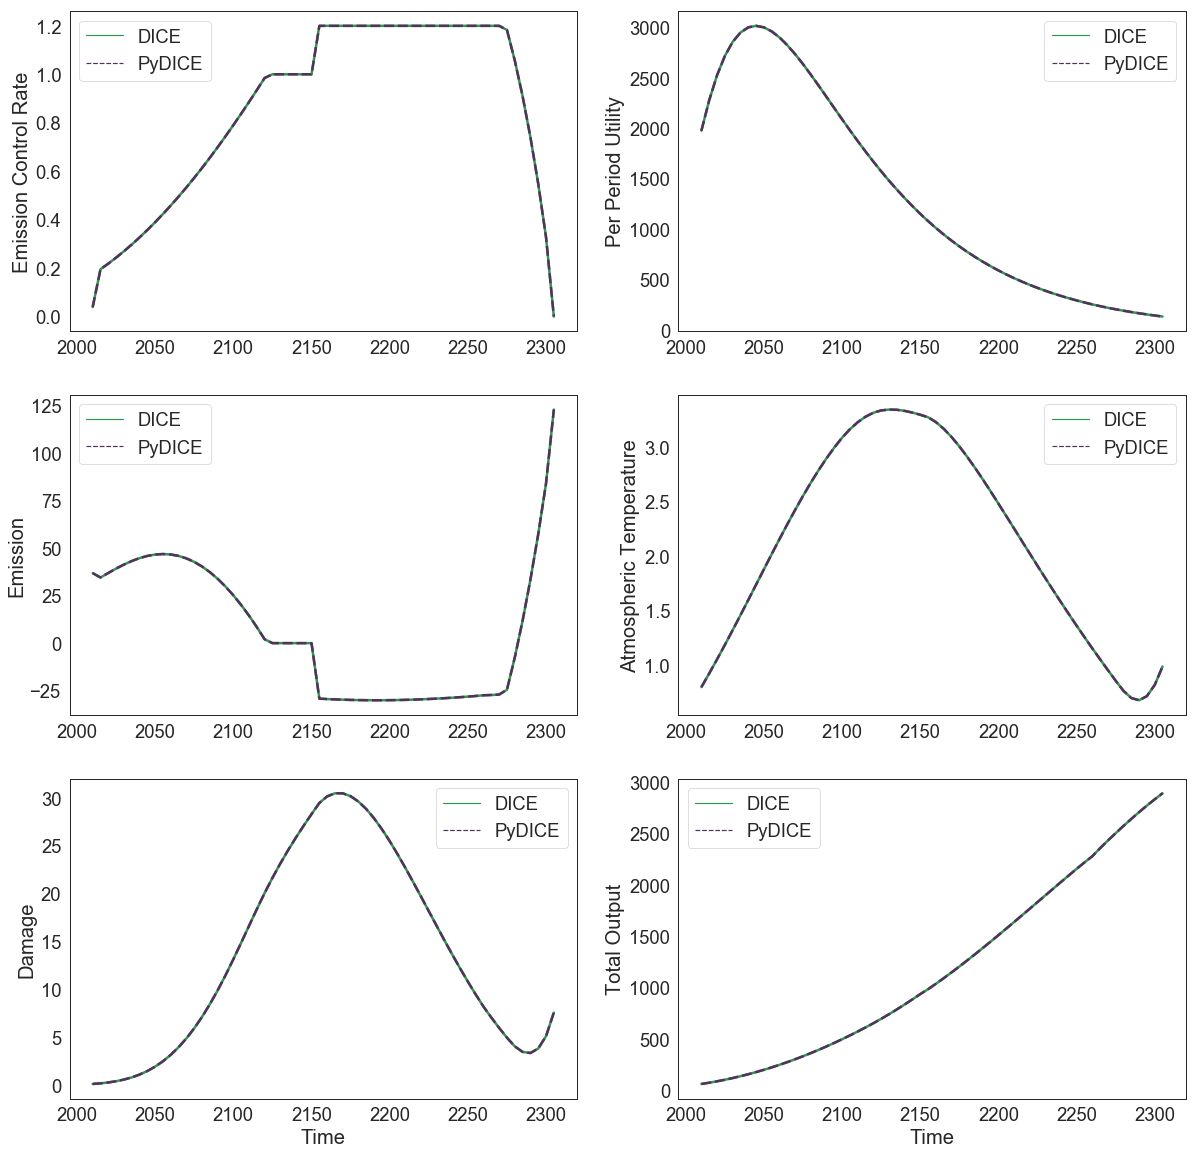

In [25]:
sns.set("paper", "white", font_scale=2.1)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

for i in range (3):
    for j in range (2):
        sns.lineplot(data = pd.DataFrame([dice_om_plot[2*i+j], dice_sm_plot[2*i+j]], 
                                         index = ["DICE", "PyDICE"], 
                                         columns=list(range(2010,2310,5))).T, 
                     linewidth = 2.5, palette=clr_palette, ax=axes[i,j])
        axes[i,j].set_ylabel(title_list[2*i+j])
        axes[2,j].set_xlabel("Time")
        #axes[i,j].xaxis.set_ticks(np.arange(2010, 2310, 5))
        
plt.show()

In [26]:
fig.savefig('PyDICE_Validation.png', bbox_inches = "tight")

In [24]:
validDF = pd.DataFrame()
for i in range (3):
    for j in range (2):
        arrays = [[title_list[2*i+j],title_list[2*i+j]],["DICE", "PyDICE"]]
        tuples = list(zip(*arrays))
        index = pd.MultiIndex.from_tuples(tuples)
        data = pd.DataFrame([dice_om_plot[2*i+j], dice_sm_plot[2*i+j]], 
                            index = index, 
                            columns=list(range(2010,2310,5))).T
        validDF = pd.concat([validDF,data], axis=1)

In [15]:
validDF.to_excel('PyDICE_Validation.xlsx')